## Problem Statement

Yulu, India’s leading micro-mobility service provider, is facing a significant decline in revenues. To understand the factors influencing the demand for shared electric cycles in the Indian market, Yulu has engaged a consulting company. The primary objectives are to identify significant variables predicting the demand, assess the descriptive power of these variables, and gain insights into the factors affecting the demand. The analysis involves exploring a dataset (yulu_data.csv) and performing various statistical tests such as 2-sample T-Test, ANOVA, and Chi-square. Key questions to address include the impact of working days on cycle rentals, variations in rental numbers across different seasons and weather conditions, and the dependency between weather and season. The analysis aims to provide actionable insights for Yulu to optimize its micro-mobility services.

In [30]:
# Importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [2]:
#Reading dataset in pandas dataframe
df = pd.read_csv('bike_sharing.txt')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape # Rows- 10886, Columns- 12

(10886, 12)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime']) #Conversion of "datetime" column from object to datetime

In [7]:
df.describe() #Statistical summary of the continuous columns

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
df.isnull().sum() #Null values check for each column

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df.duplicated().sum() # Checking duplicate values in the dataset

0

## Graphical Analysis

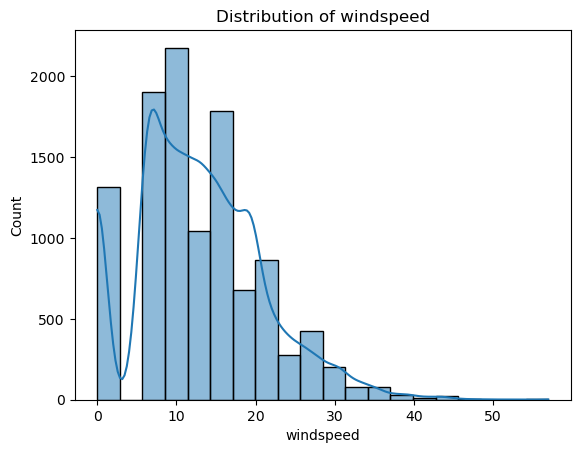

In [10]:
sns.histplot(df['windspeed'], kde=True, bins =20)
plt.title("Distribution of windspeed")
plt.show()

<Axes: xlabel='holiday', ylabel='count'>

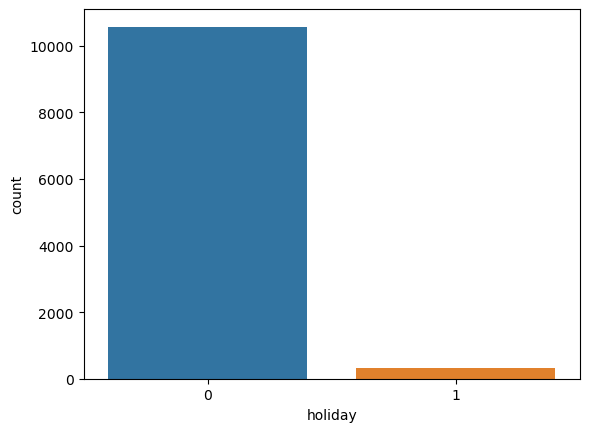

In [11]:
sns.countplot(data=df, x='holiday')

<Axes: xlabel='workingday', ylabel='count'>

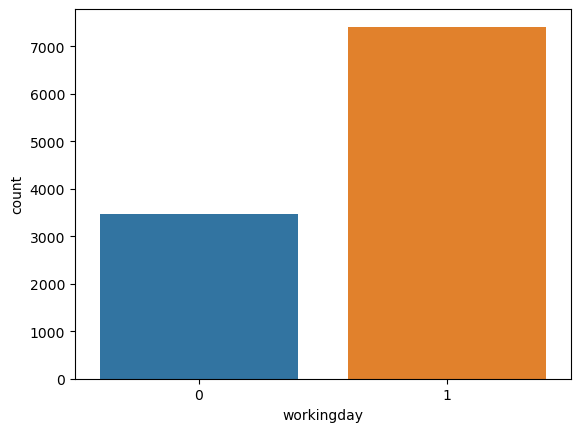

In [12]:
sns.countplot(data=df, x='workingday')

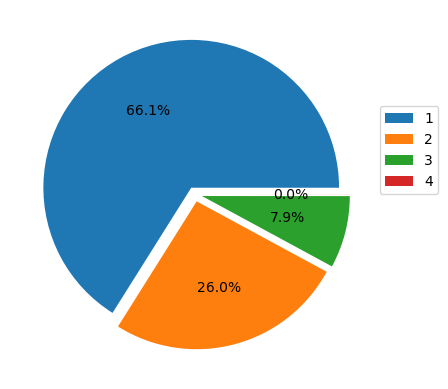

In [13]:
plt.pie(df['weather'].value_counts(), autopct='%2.1f%%', explode=[0.05,0.05,0.05, 0.05])
plt.legend(df['weather'].value_counts().index, loc=[1,0.5])
plt.show()

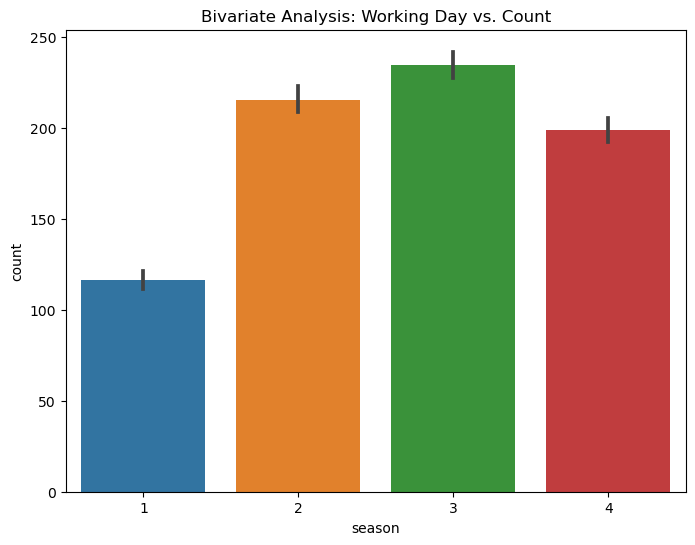

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='count', data=df)
plt.title('Bivariate Analysis: Working Day vs. Count')
plt.show()

## Outliers Detection and Treatment

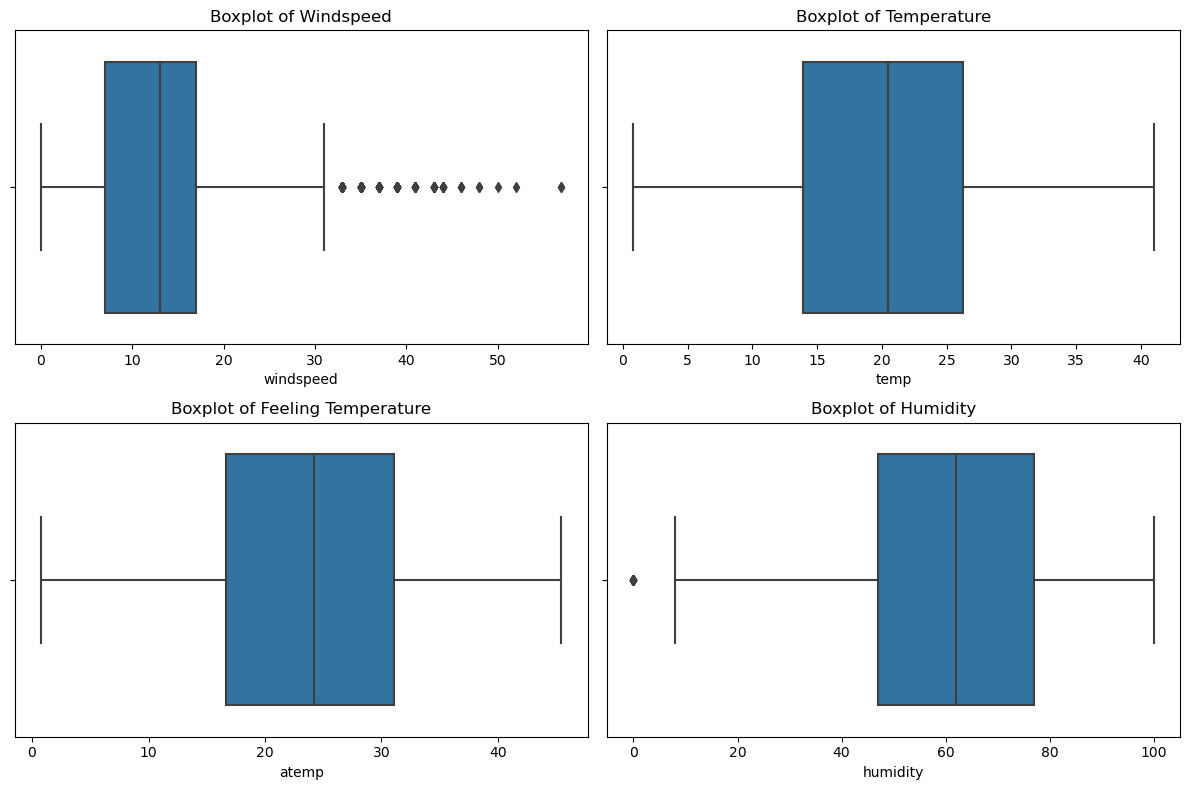

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


sns.boxplot(data=df, x='windspeed', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Windspeed')


sns.boxplot(data=df, x='temp', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Temperature')


sns.boxplot(data=df, x='atemp', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Feeling Temperature')


sns.boxplot(data=df, x='humidity', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Humidity')


plt.tight_layout()
plt.show()


In [15]:
# Calculating 5th and 95th percentile for 'Windspeed', 'Humidity'

windspeed_5 = np.percentile(df['windspeed'], 5)
windspeed_95 = np.percentile(df['windspeed'], 95)

df['windspeed'] = np.clip(df['windspeed'], windspeed_5, windspeed_95)

In [16]:
humidity_5 = np.percentile(df['humidity'], 5)
humidity_95  = np.percentile(df['humidity'], 95)

df['humidity'] = np.clip(df['humidity'], humidity_5, humidity_95)

## Bi-Variate Analysis

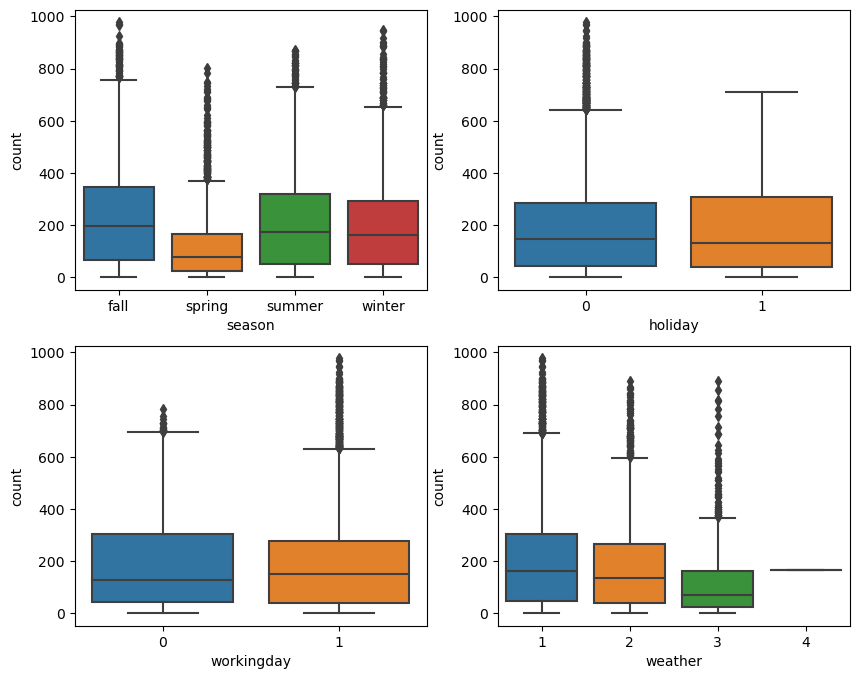

In [70]:
# plotting categorical variables againt count using boxplots
cat_cols= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
plt.show()

- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly
more bikes were rented.

- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

## Correlation

In [17]:
correlation_matrix = df[['holiday','workingday','weather', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']].corr()

In [18]:
correlation_matrix

,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.250491,-0.007074,-0.005215,0.000110,0.009155,0.043799,-0.020956,-0.005393
workingday,-0.250491,1.000000,0.033772,0.024660,-0.009697,0.015318,-0.319111,0.119460,0.011594
weather,-0.007074,0.033772,1.000000,-0.055376,0.414295,0.003731,-0.135918,-0.109340,-0.128655
atemp,-0.005215,0.024660,-0.055376,1.000000,-0.042611,-0.051960,0.462067,0.314635,0.389784
humidity,0.000110,-0.009697,0.414295,-0.042611,1.000000,-0.320708,-0.352384,-0.271640,-0.323683
windspeed,0.009155,0.015318,0.003731,-0.051960,-0.320708,1.000000,0.098339,0.098031,0.108861
casual,0.043799,-0.319111,-0.135918,0.462067,-0.352384,0.098339,1.000000,0.497250,0.690414
registered,-0.020956,0.119460,-0.109340,0.314635,-0.271640,0.098031,0.497250,1.000000,0.970948
count,-0.005393,0.011594,-0.128655,0.389784,-0.323683,0.108861,0.690414,0.970948,1.000000


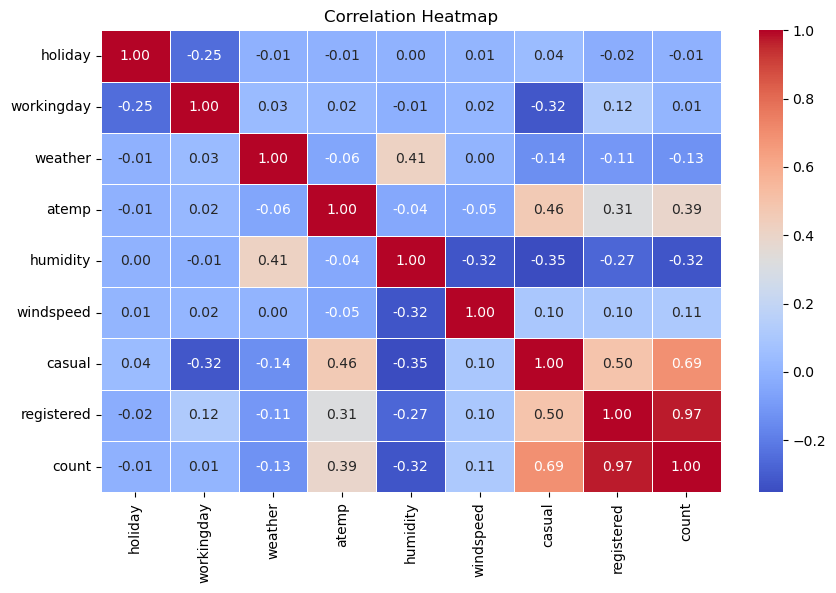

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Hypothesis Testing - 1

- Problem Statement: Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?
- Null Hypothesis: Working day has no effect on the number of cycles being rented.
- Alternate Hypothesis: Working day has effect on the number of cycles being rented.
- Significance level (alpha): 0.05


In [22]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [23]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

In [24]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

- Conclusion: Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't
have the sufficient evidence to say that working day has effect on the number of
cycles being rented.

## Hypothesis Testing - 2
- Problem Statement: Check if the demand of bicycles on rent is the same for different Weather conditions?
- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.
- Significance level (alpha): 0.05

In [26]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


- Visual Tests to know if the samples follow normal distribution

[]

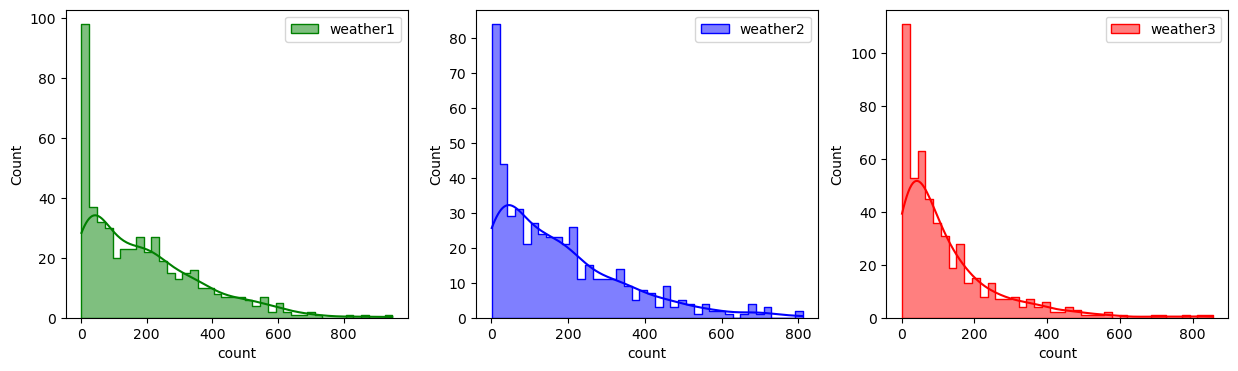

In [28]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, 
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

#### Distribution check using QQ Plot

[]

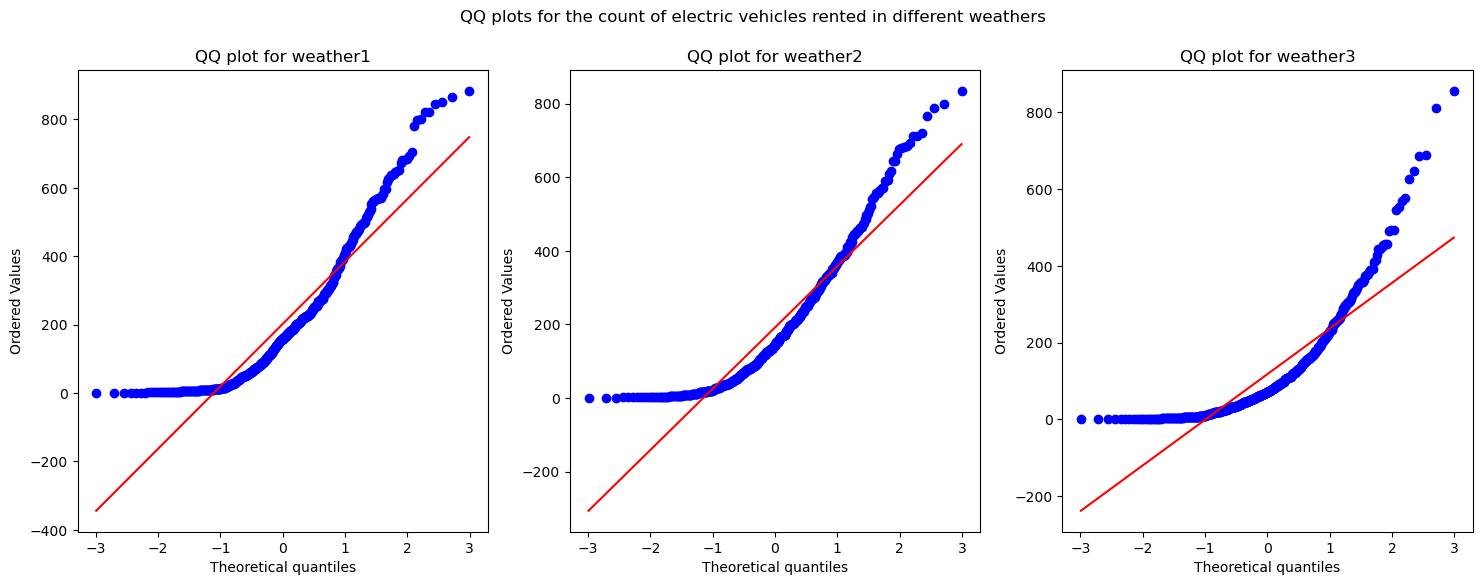

In [31]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.
- Applying Shapiro-Wilk test for normality
 : The sample follows normal distribution 
 : The sample does not follow normal distribution

- alpha = 0.05

- Test Statistics : Shapiro-Wilk test for normality

In [32]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 3.577414300741489e-20
The sample does not follow normal distribution


In [33]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 8.358062322608804e-20
The sample does not follow normal distribution


In [34]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.584672700176115e-25
The sample does not follow normal distribution


Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

In [35]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.626948944103503e-28
The sample does not follow normal distribution


In [36]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9216098393369846e-19
The sample does not follow normal distribution


In [37]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.4133181593933841e-06
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

#### Homogeneity of Variances using Levene's test

In [38]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.920784491463785e-15
The samples do not have  Homogenous Variance


-- Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45

In [ ]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis

Therefore, the average number of rental bikes is statistically different for different weathers.

## Hypothesis Testing- 3

- Problem: Check if the demand of bicycles on rent is the same for different Seasons?

- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

In [43]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [50]:
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [51]:
df['season'] = df['season'].astype('category')

In [52]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

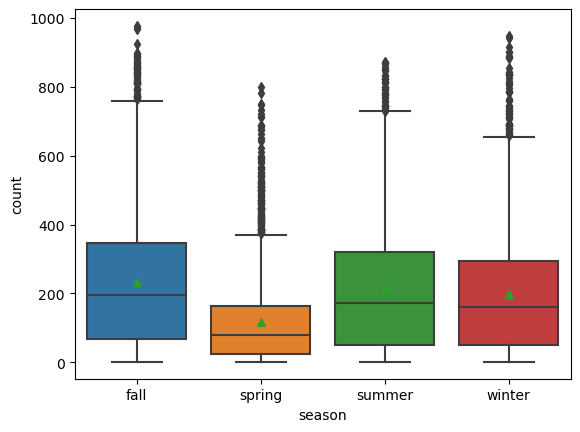

In [53]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

Visual Tests to know if the samples follow normal distribution

[]

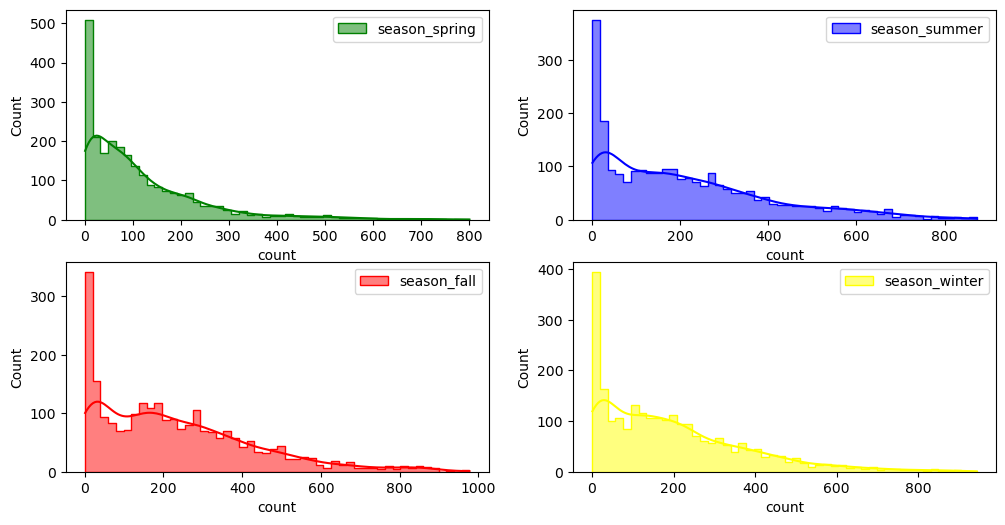

In [54]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50, 
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

#### Distribution check using QQ Plot

[]

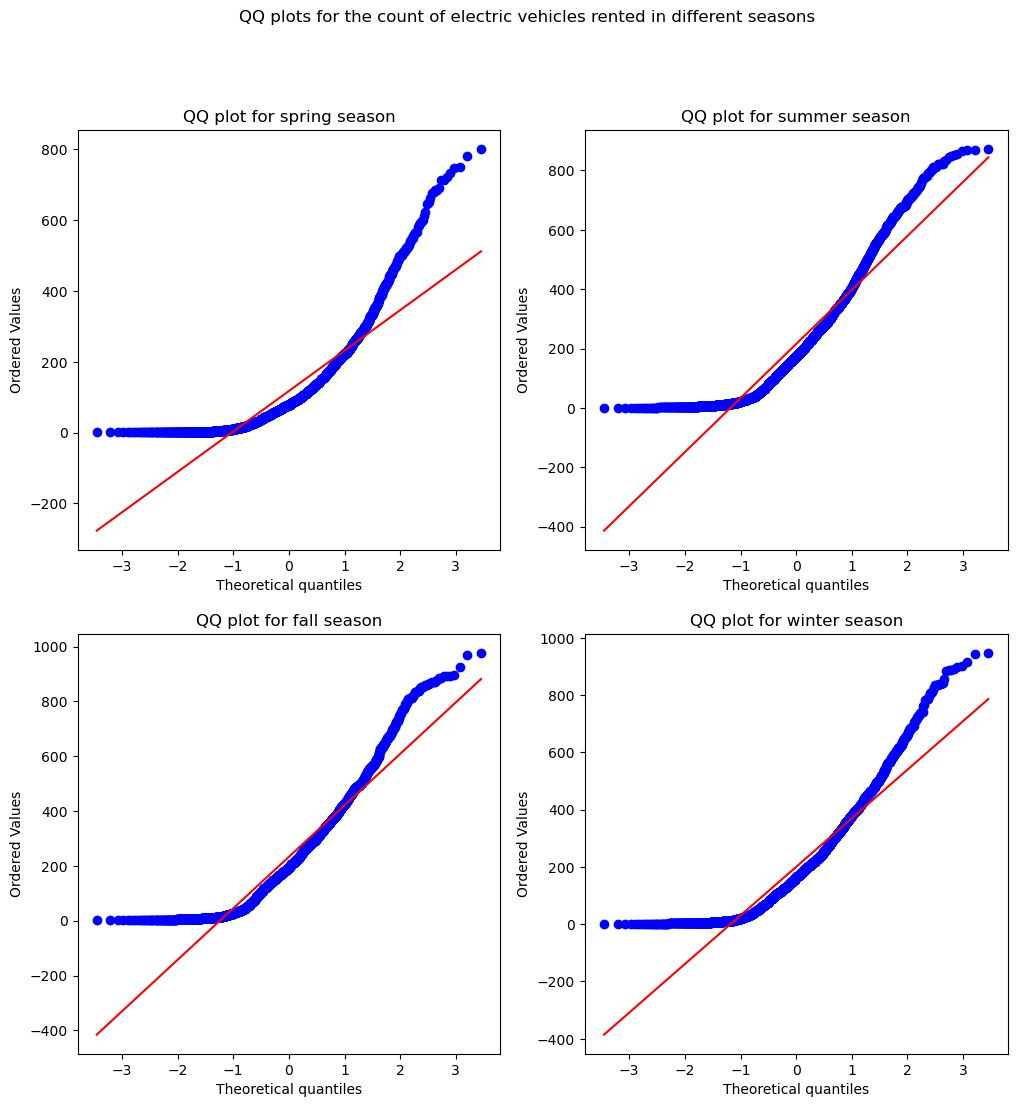

In [55]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

- It can be inferred from the above plots that the distributions do not follow normal distribution.
- It can be seen from the above plots that the samples do not come from normal distribution.
- Applying Shapiro-Wilk test for normality
 : The sample follows normal distribution 
 : The sample does not follow normal distribution

- alpha = 0.05

- Test Statistics : Shapiro-Wilk test for normality

In [56]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 0.0
The sample does not follow normal distribution


In [57]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.4892451890884912e-37
The sample does not follow normal distribution


In [58]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 7.157952731127466e-36
The sample does not follow normal distribution


In [59]:

test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.2174364852492744e-38
The sample does not follow normal distribution


Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

In [60]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 7.553432189007984e-17
The sample does not follow normal distribution


In [61]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.210886904513714e-21
The sample does not follow normal distribution


In [62]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.792420724532634e-21
The sample does not follow normal distribution


In [63]:

transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 5.15185501527329e-20
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

#### Homogeneity of Variances using Levene's test

In [65]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.502252013781783e-109
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [66]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [67]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons.

## Hypothesis Testing- 4:
- Problem: Chi-square test to check if Weather is dependent on the season

- Null Hypothesis (H0): Weather is independent of the season
- Alternate Hypothesis (H1): Weather is not independent of the season
-  Significance level (alpha): 0.05

In [71]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [77]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
print(expected_values)
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)
critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")
p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

[[1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.


## Data Overview

1. Data Timeframe: Dataset spans from January 1st, 2011 to December 19th, 2012 (718 days).
2. User Types: Approximately 19% casual users, 81% registered users.

**Bike Rental Trends**

1. Annual Growth: Mean hourly bike rentals increased by 65.41% from 2011 (144 bikes/hour) to 2012 (239 bikes/hour).
2. Seasonal Demand: Highest demand in spring/summer, declining through fall/winter.
3. Daily Fluctuations: Demand peaks in the afternoon, with lower usage in the early morning and late at night.
4. Lowest Usage Months: January, February, and March see the least average hourly rentals.


**Enviornmental factrors**

1. Temperature: Over 80% of data points have temperatures below 28 degrees Celsius.
2. Humidity: Over 80% of the time, humidity exceeds 40%, indicating often humid conditions.
3. Windspeed: Over 85% of data points show wind speeds below 20 (units needed - kmh, mph, etc.).
4. Weather Impact: Highest bike rentals occur during clear or cloudy weather, fewer during mist or rain. Extreme weather conditions are infrequent in the data.

**Statistical Insights**

1. Working vs. Non-Working Days: No statistically significant difference in mean hourly bike rentals.
2. Weather/Season Dependency: Hourly bike rentals show statistical dependency on weather and season.
3. Weather-Based Differences: Hourly bike rentals vary significantly across different weather types.
4. Weather 1,2,3 vs. Season: No statistically significant dependency between these specific weather types (1, 2, 3) and season in terms of bike rentals.